In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

plt.rcParams['font.family'] = 'Times New Roman'

星系名称：2dFGRS TGN173Z039（SDSSJ114340.83-032658.5）

坐标：ra 175.92011，dec -3.4496

1、图像

Text(0.5, 1.0, 'z-band')

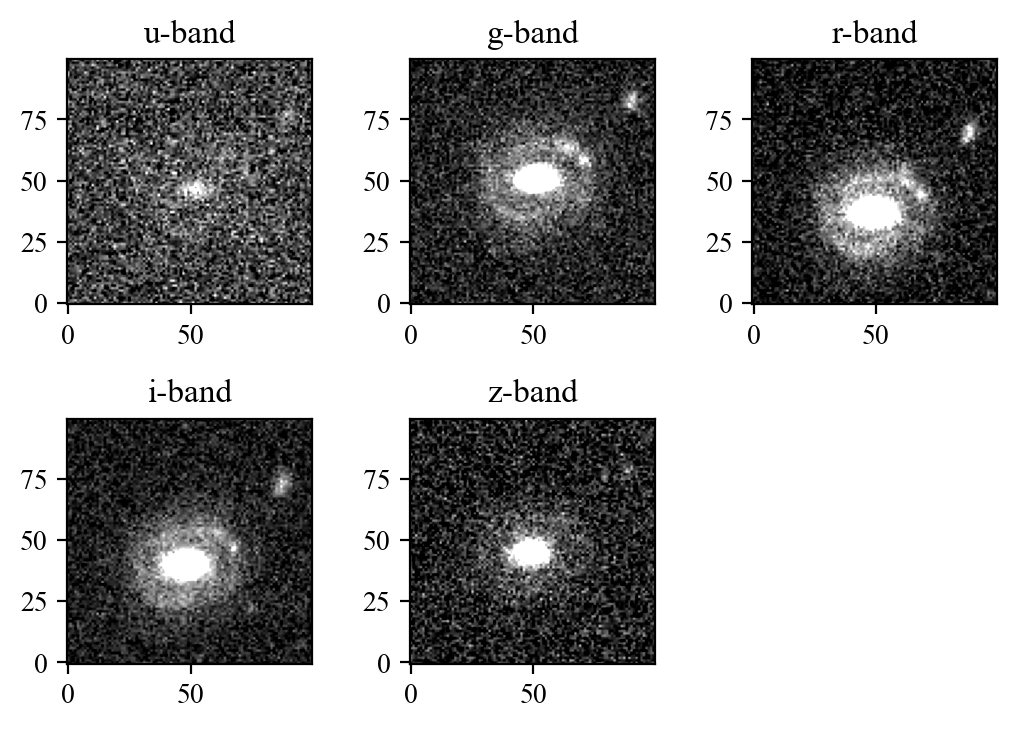

In [2]:
path = '/Users/katerina/created/doctorate/星系天文学-shen/作业/J1143-0326/'
image_u = fits.getdata(path+'frame-u-005973-1-0054.fits')
image_g = fits.getdata(path+'frame-g-005973-1-0054.fits')
image_r = fits.getdata(path+'frame-r-005973-1-0054.fits')
image_i = fits.getdata(path+'frame-i-005973-1-0054.fits')
image_z = fits.getdata(path+'frame-z-005973-1-0054.fits')

plt.figure(figsize=(6,4),dpi=200)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.subplot(2,3,1)
plt.imshow(image_u[670:770,150:250], origin='lower', vmin=-0.036, vmax=0.11, cmap='gray')
plt.title('u-band')
# plt.colorbar()

plt.subplot(2,3,2)
plt.imshow(image_g[670:770,150:250], origin='lower', vmin=-0.0163, vmax=0.108, cmap='gray')
plt.title('g-band')
# plt.colorbar()

plt.subplot(2,3,3)
plt.imshow(image_r[670:770,150:250], origin='lower', vmin=-0.012, vmax=0.14, cmap='gray')
plt.title('r-band')

plt.subplot(2,3,4)
plt.imshow(image_i[670:770,150:250], origin='lower', vmin=-0.027, vmax=0.23, cmap='gray')
plt.title('i-band')

plt.subplot(2,3,5)
plt.imshow(image_z[670:770,150:250], origin='lower', vmin=-0.065, vmax=0.55, cmap='gray')
plt.title('z-band')

#漩涡星系（Sb）

/Users/katerina/opt/anaconda3/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


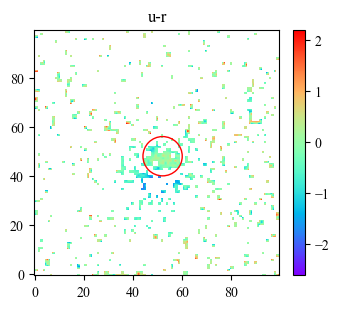

In [14]:
#u-r color
plt.figure(figsize=(3.5,3.5))
plt.imshow((np.log10(image_u[670:770,150:250]/image_r[670:770,150:250])), origin='lower',cmap='rainbow')
plt.title('u-r')
plt.colorbar(fraction=0.045)
circle = plt.Circle((52, 48), 8, color='r', fill=False, linewidth=1)
plt.gca().add_patch(circle)
#星系中央的上方u-r值较大，可能有恒星形成

2、光谱

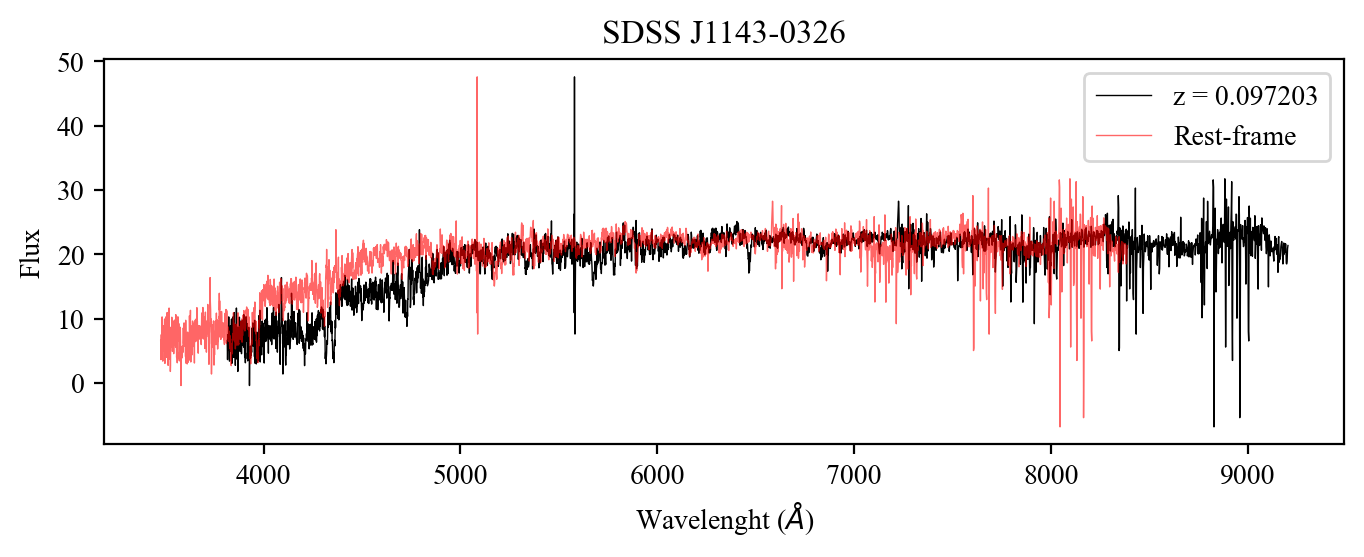

In [15]:
spec = fits.getdata(path+'spec-0328-52282-0002.fits')
plt.figure(figsize=(8, 2.5), dpi=200)
plt.plot(10**spec['loglam'], spec['flux'], lw=0.5,c='k',label='z = 0.097203')

#SDSS给出该星系的红移为0.097203，把光谱校正到静止帧
z = 0.097203
plt.plot((10**spec['loglam'])/(1.+z), spec['flux'],lw=0.5,c='r',label='Rest-frame',alpha=0.6)
# plt.fill_betweenx([np.min(spec['flux']), 40], 4847.875, 4876.625, color='orange', alpha=0.3)
# plt.text((4847.875 + 4876.625)/2., 40+4, r'H $\beta$',fontsize=5, ha='center', color='b',rotation=90)
    
plt.xlabel(r'Wavelenght ($\AA$)')
plt.ylabel('Flux')
plt.title('SDSS J1143-0326')
plt.legend()
plt.show()


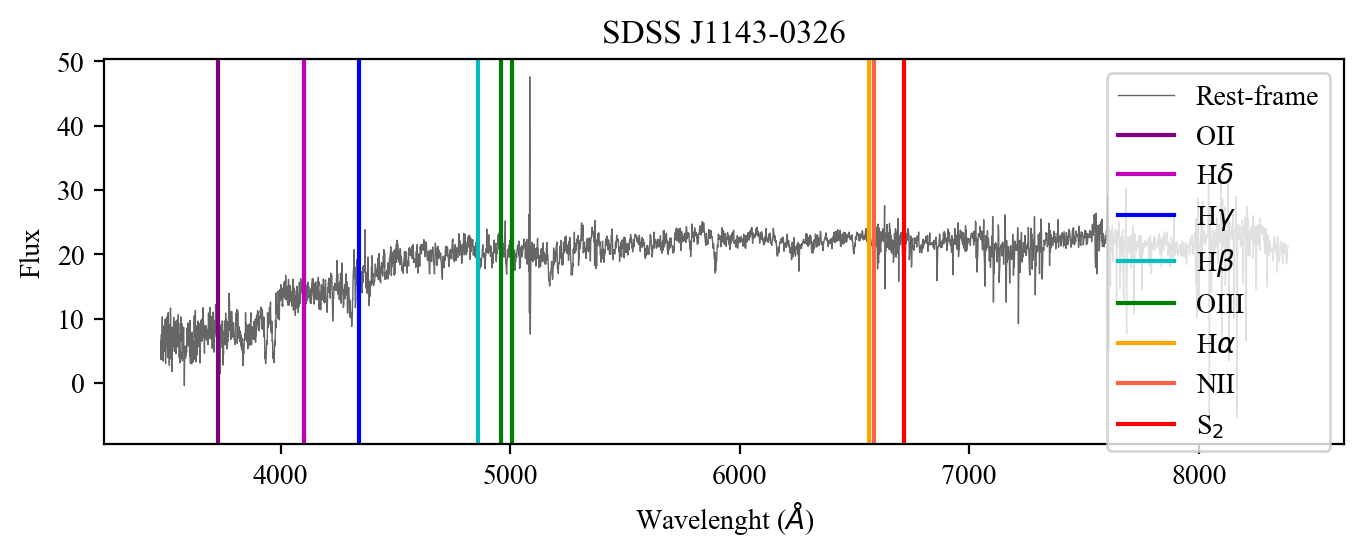

In [16]:
plt.figure(figsize=(8, 2.5),dpi=200)
plt.plot((10**spec['loglam'])/(1.+z), spec['flux'],lw=0.5,c='k',label='Rest-frame',alpha=0.6)

plt.axvline(x=3727.3, label=r'OII',c='purple')
plt.axvline(x=4102.8, label=r'H$\delta$',c='m')
plt.axvline(x=4340.0, label=r'H$\gamma$',c='b')
plt.axvline(x=4861.3, label=r'H$\beta$',c='c')
plt.axvline(x=4959.0, label=r'OIII',c='g')
plt.axvline(x=5006.8, c='g')
plt.axvline(x=6562.8, label=r'H$\alpha$',c='orange')
plt.axvline(x=6584, label=r'NII',c='tomato')
plt.axvline(x=6716.0, label=r'S$_{2}$',c='r')

plt.xlabel(r'Wavelenght ($\AA$)')
plt.ylabel('Flux')
plt.title('SDSS J1143-0326')
plt.legend(frameon=1)


D4000: 0.9793451


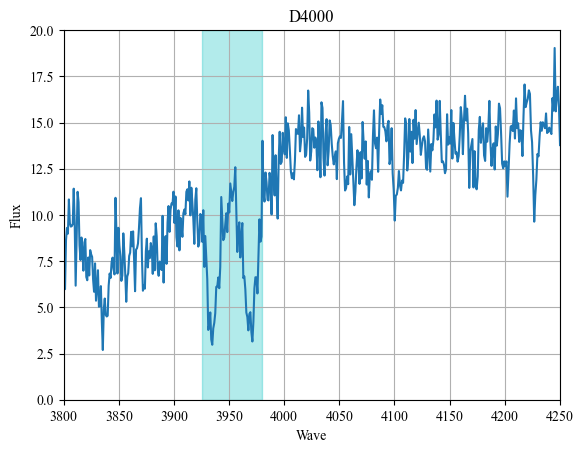

In [18]:
plt.plot((10**spec['loglam'])/(1.+z), spec['flux'])
plt.ylim(0, 20)
plt.xlim(3800,4250)
plt.fill_betweenx([0, 20], 3925, 3980, color='c', alpha=0.3)
plt.xlabel('Wave')
plt.ylabel('Flux')
plt.title('D4000')
plt.grid()


band = np.where(((10**spec['loglam'])/(1.+z)> 3925) & ((10**spec['loglam'])/(1.+z)<3980))
cont = np.where(((10**spec['loglam'])/(1.+z)> 3850) & ((10**spec['loglam'])/(1.+z)<3900))
D4000 = (np.sum(spec['flux'][band])/np.sum(spec['flux'][cont]))
print('D4000:', D4000)

3、表面亮度轮廓

In [45]:
from autoprof import Pipeline

config_file = './galaxy_profile/test_config.txt'
PIPELINE = Pipeline.Isophote_Pipeline(loggername='xxx')
PIPELINE.Process_ConfigFile(config_file=config_file)

testimage: head background at: 0.0 sec
testimage: head background at: 0.0 sec
testimage: head psf at: 0.6 sec
testimage: head psf at: 0.6 sec
testimage: PSF assumed to be: 4.0000e+00 pix
testimage: head center at: 0.6 sec
testimage: head center at: 0.6 sec
testimage: head isophoteinit at: 1.7 sec
testimage: head isophoteinit at: 1.7 sec
testimage: init scale: 95.396217 pix
testimage: head isophotefit at: 3.4 sec
testimage: head isophotefit at: 3.4 sec
testimage: Completed isohpote fit in 108 itterations
testimage: head isophoteextract at: 9.3 sec
testimage: head isophoteextract at: 9.3 sec
testimage: R complete in range [1.0,189.1]
testimage: head checkfit at: 10.6 sec
testimage: head checkfit at: 10.6 sec
testimage: head writeprof at: 10.8 sec
testimage: head writeprof at: 10.8 sec
testimage: Processing Complete! (at 10.8 sec)
testimage: Processing Complete! (at 10.8 sec)


{'background': 0.6278679370880127,
 'psf': 0.00044798851013183594,
 'center': 1.0841481685638428,
 'isophoteinit': 1.6528639793395996,
 'isophotefit': 5.907364130020142,
 'isophoteextract': 1.30458402633667,
 'checkfit': 0.17387676239013672,
 'writeprof': 0.007279157638549805}

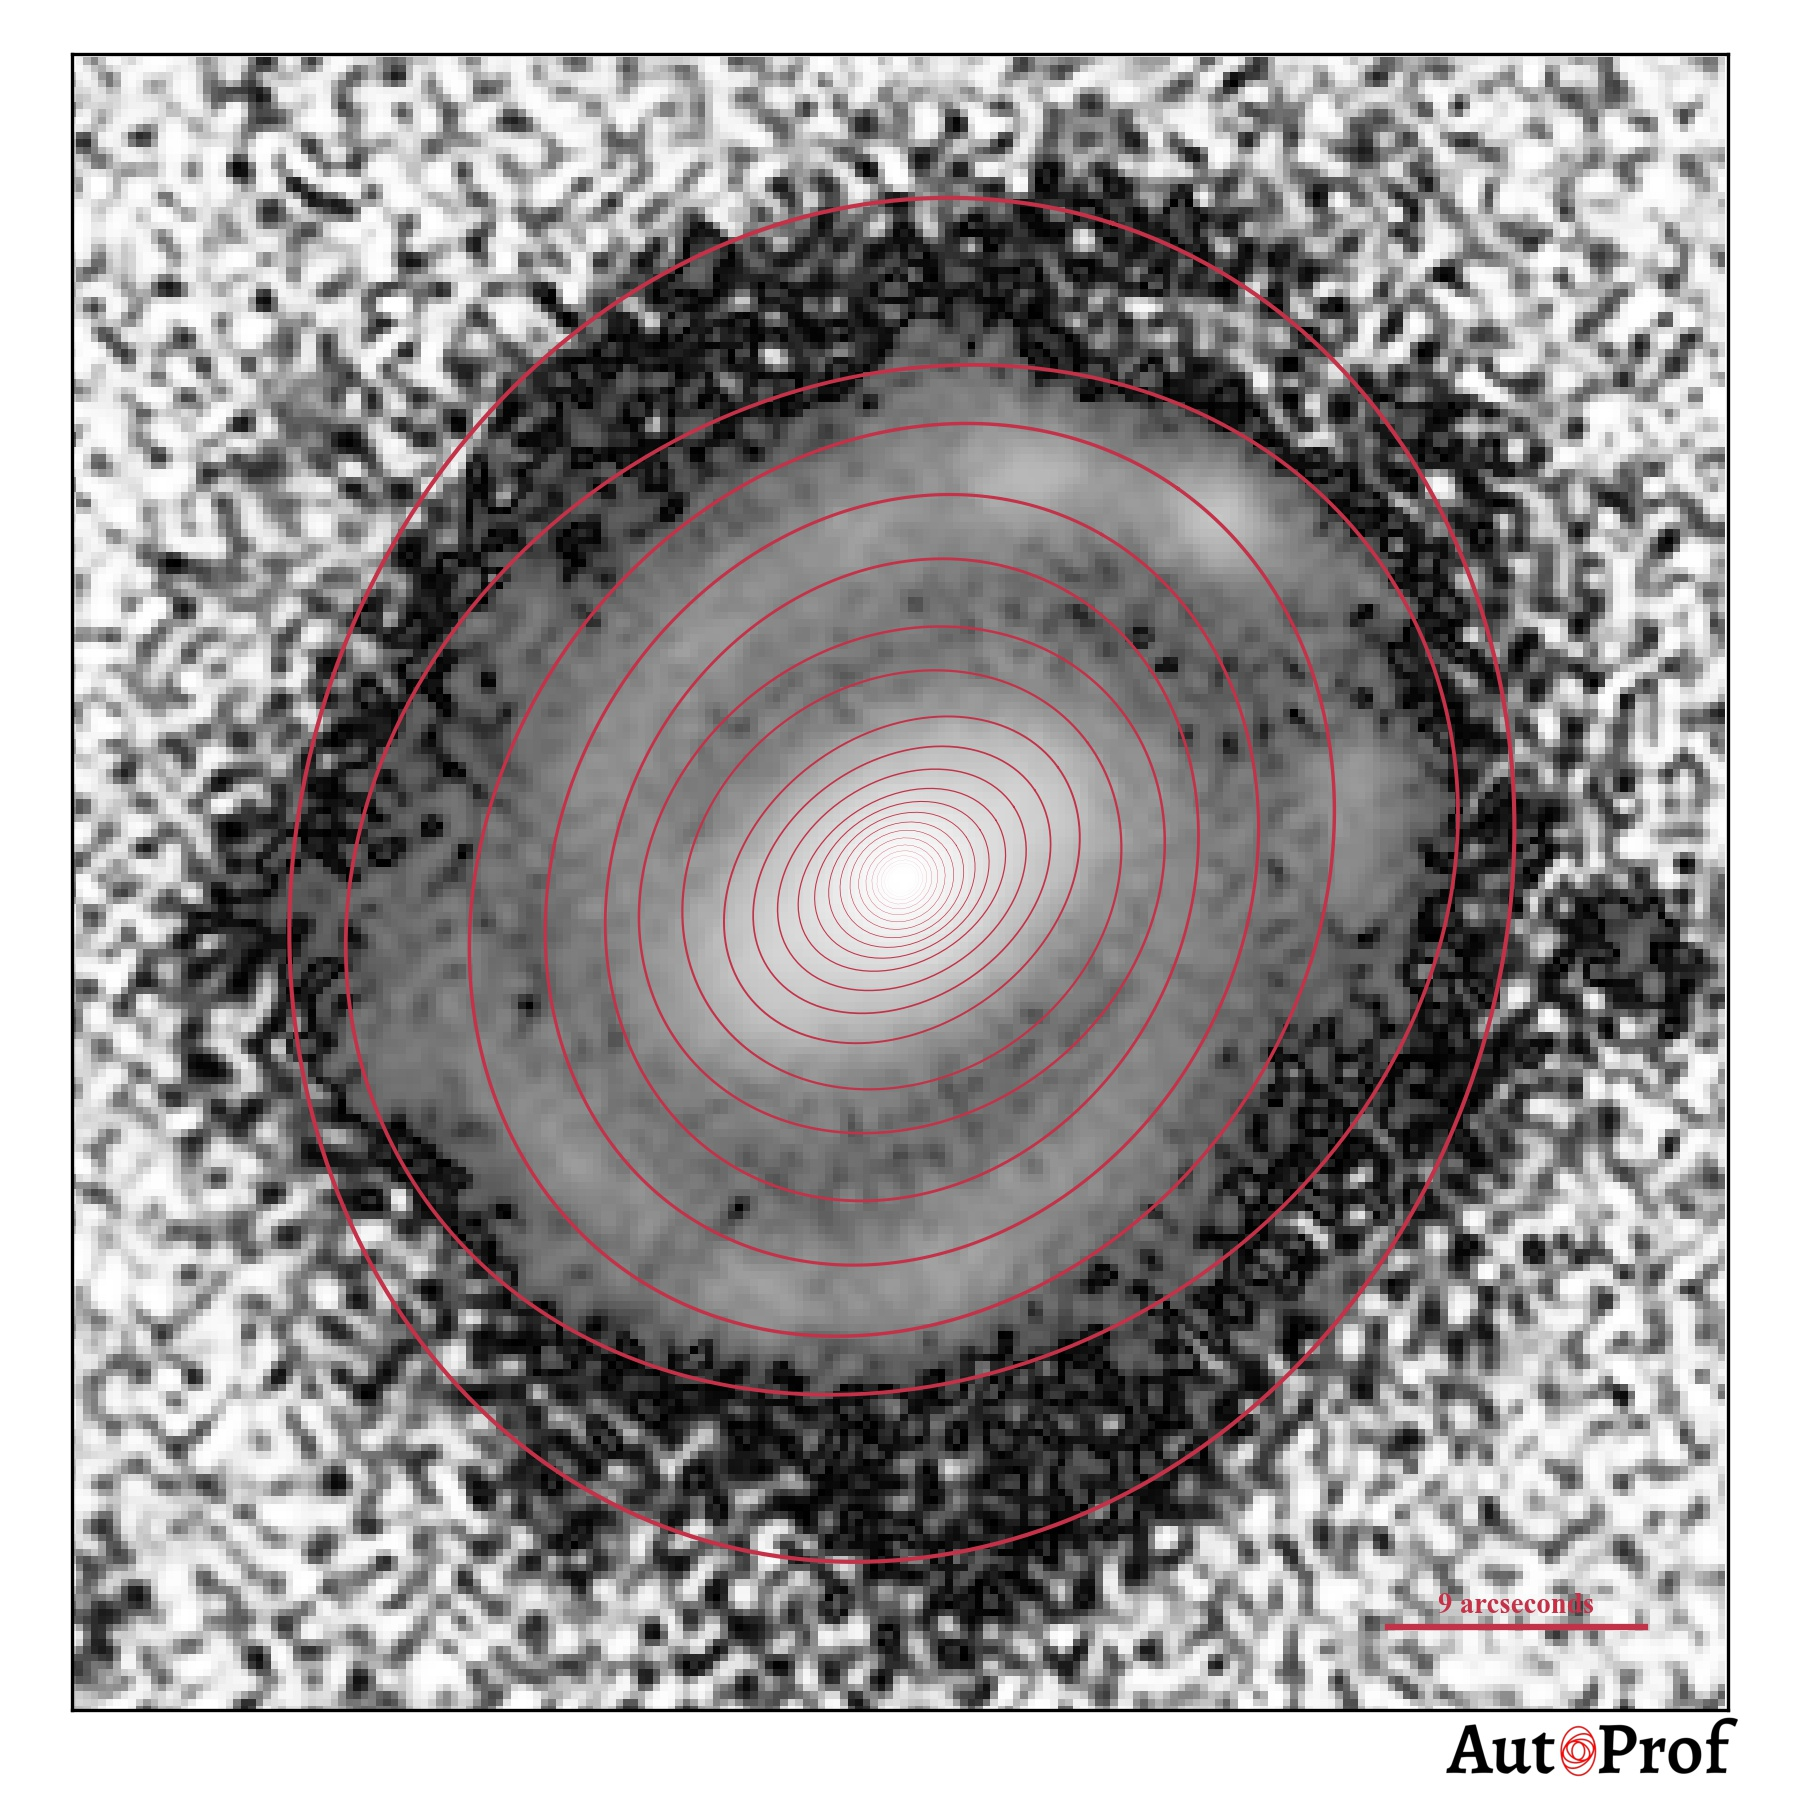

In [49]:
#g-band
from IPython.display import Image
Image(filename='fit_ellipse_testimage.jpg', width=500, height=300)

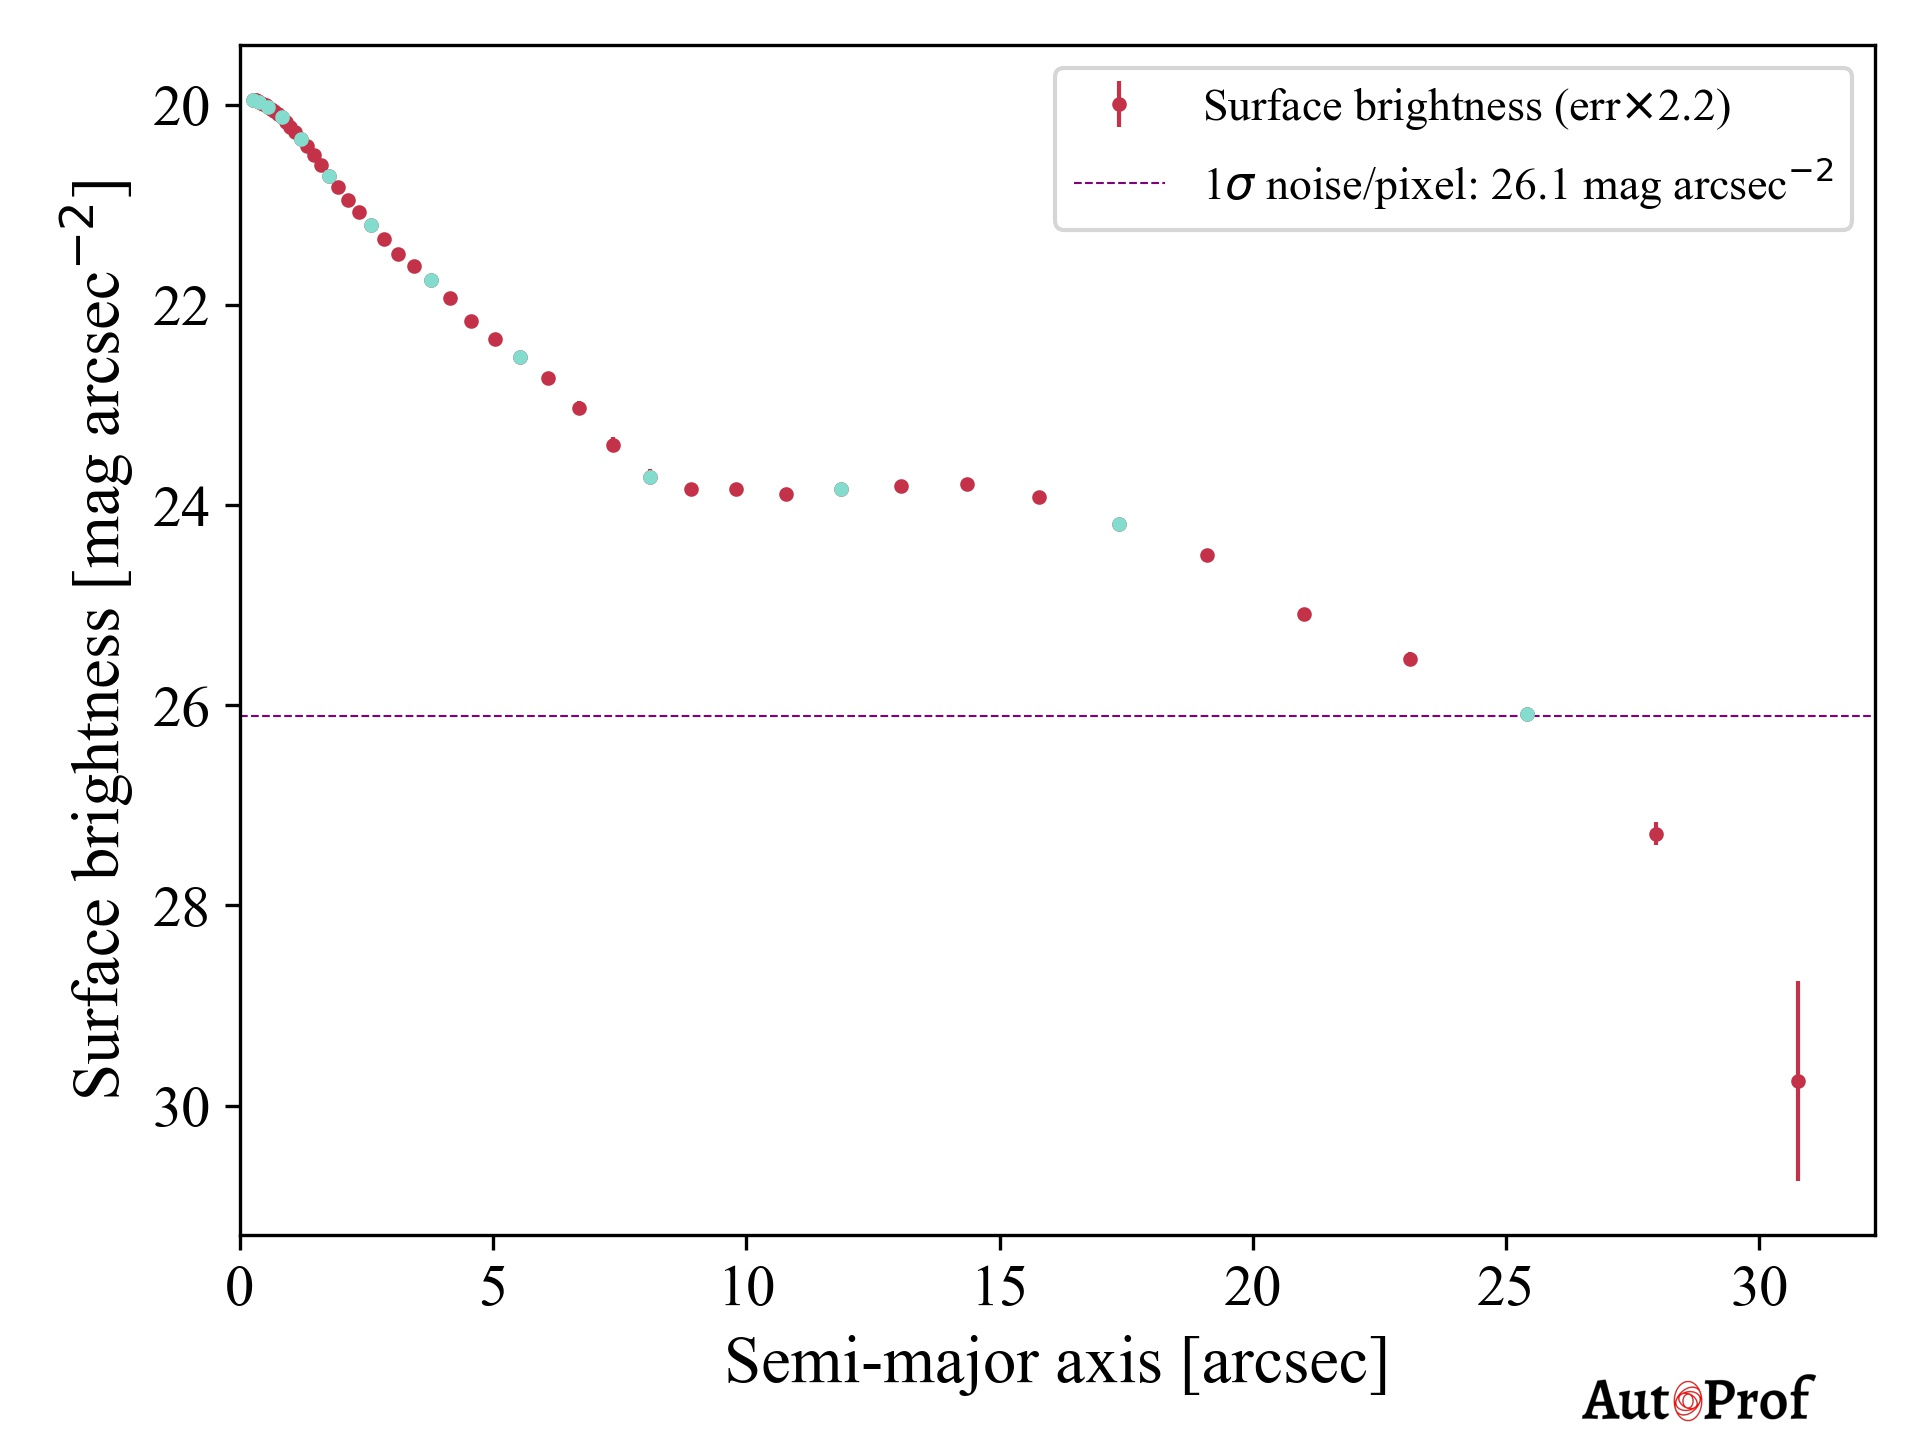

In [50]:
Image(filename='photometry_testimage.jpg', width=500, height=300)

In [ ]:
###
10角秒外面的那个平台是什么原因造成的？

4、SED拟合

Text(0, 0.5, 'Relative\nresidual')

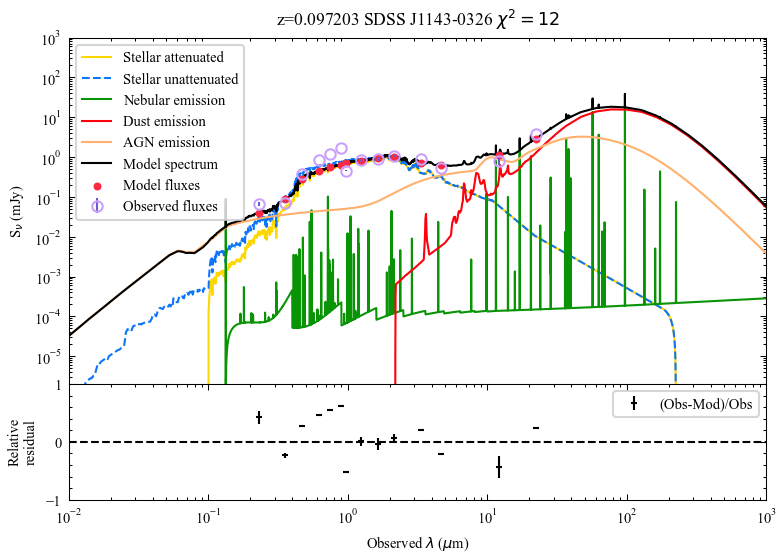

In [51]:
from scipy.constants import c
from astropy.table import Table
import matplotlib.gridspec as gridspec
sed = Table.read('/Users/katerina/created/doctorate/sedfit/out/0_best_model.fits')
wavelength_spec = sed["wavelength"] * 1e-3


surf = 4.0 * np.pi * 1.372973E25 ** 2
fact = 1e29 * 1e-3 * wavelength_spec ** 2 / c / surf
for cname in sed.colnames[1:]:
    sed[cname] *= fact


spectrum = sed["stellar.young"] + sed["stellar.old"]
spectrum += sed["nebular.absorption_young"]
spectrum += sed["nebular.absorption_old"]
spectrum += sed["attenuation.stellar.young"]
spectrum += sed["attenuation.stellar.old"]

spectrum1 = sed["nebular.lines_young"] + sed["nebular.lines_old"]+ sed["nebular.continuum_young"]+ sed["nebular.continuum_old"]
spectrum1 += sed["attenuation.nebular.lines_young"]
spectrum1 += sed["attenuation.nebular.lines_old"]
spectrum1 += sed["attenuation.nebular.continuum_young"]
spectrum1 += sed["attenuation.nebular.continuum_old"]

agn_sed = sed["agn.SKIRTOR2016_polar_dust"] + sed["agn.SKIRTOR2016_torus"] + sed["agn.SKIRTOR2016_disk"]

filters_wl = np.array([0.2299245,   0.3556524,   0.47024953,  0.61755789,  0.74899768,  0.89467096,
                       0.96277937,  1.23580895,  1.64575039,  2.16030949,  3.36822134,  4.6179058,
                       12.06943689, 22.19568032])
mod_fluxes = np.array([0.03867263, 0.08936953, 0.27418914, 0.44920906, 0.54974744, 0.64994983,
                       0.69502827, 0.81173601, 0.94162498, 0.99692644, 0.71825458, 0.64816829,
                       1.15305592, 2.8872997 ])
obs_fluxes = np.array([6.77e-02,7.24e-02,0.381,0.851,1.23,1.68,0.455,0.822,0.906,1.06, 0.897,0.533,0.801,3.79])
obs_fluxes_err = np.array([7.6e-03,2.9e-03,2.0e-03,4.0e-03,1e-03,1.0e-02,7.0e-03,6.6e-02,9.0e-02,8.0e-02,4.0e-03,6.0e-03,0.156,1e-03])

plt.style.use(['science','nature', 'no-latex'])
plt.rcParams['font.family']='Times New Roman'

figure = plt.figure(figsize=(6,4),dpi=150)
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
figure.subplots_adjust(hspace=0.0, wspace=0.0)

plt.subplot(gs[0])
plt.plot(wavelength_spec, spectrum, color="gold",linestyle="-",linewidth=1.0, label="Stellar attenuated")
plt.plot(wavelength_spec, sed["stellar.old"] + sed["stellar.young"], color="xkcd:deep sky blue",linestyle="--",linewidth=1.0, label="Stellar unattenuated")
plt.plot(wavelength_spec, spectrum1, color="xkcd:true green",linestyle="-",linewidth=1.0, label="Nebular emission")
plt.plot(wavelength_spec, sed["dust"], color="xkcd:bright red",linestyle="-",linewidth=1.0 , label="Dust emission")
plt.plot(wavelength_spec, agn_sed, color="xkcd:apricot",linestyle="-",linewidth=1.0, label="AGN emission")
plt.plot(wavelength_spec, sed["L_lambda_total"], 'k', label="Model spectrum")
plt.scatter(filters_wl,mod_fluxes,marker="o",color="xkcd:strawberry",s=8,zorder=3,label="Model fluxes")
plt.errorbar(filters_wl,obs_fluxes,yerr=obs_fluxes_err,
            ls="",
            marker="o",
            label="Observed fluxes",
            markerfacecolor="None",
            markersize=5,
            markeredgecolor="xkcd:pastel purple",
            color="xkcd:light indigo",
            capsize=0.0,
            zorder=3,
            lw=1
            )

plt.legend(frameon=1, loc=2)


plt.xlim(10*1e-3, 1e3)
plt.ylim(2*1e-6, 1e3)

plt.xscale('log')
plt.yscale('log')
plt.tick_params(direction="in",
                axis="both",
                which="both",
                top=True,
                left=True,
                right=True,
                bottom=False
                )
plt.xticks([])
plt.ylabel(r"S$_\nu$ (mJy)")
plt.title(r'z=0.097203 SDSS J1143-0326 $\chi^2=12$')

plt.subplot(gs[1])
plt.errorbar(filters_wl,(obs_fluxes - mod_fluxes) / obs_fluxes,
            yerr=obs_fluxes_err / obs_fluxes,
            marker="_",
            label="(Obs-Mod)/Obs",
            color="k",
            capsize=0.0,
            ls="None",
            lw=1)
plt.xlim(10*1e-3, 1e3)
plt.plot([10*1e-3, 1e3], [0.0, 0.0], ls="--", color="k")
plt.ylim(-1,1.)
plt.xscale('log')
plt.tick_params(direction="in",
                axis="both",
                which="both",
                top=True,
                left=True,
                right=True,
                bottom=True
                )
plt.legend(frameon=1)
plt.xlabel(r"Observed $\lambda$ ($\mu$m)")
plt.ylabel("Relative\nresidual")


## SED你和一般需要更长的波长范围